# SimpleConv2d

## 【事前準備】

In [42]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

In [43]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
# from sklearn.externals.six import StringIO
# Keras
from keras.datasets import mnist
# その他
from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント

## 【実装】

### ●MNISTのデータセット

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

# # 各画像のピクセルデータを平滑化（28x28 ⇒ 784x1）
# X_train = X_train.reshape(-1, 784)
# X_test = X_test.reshape(-1, 784)

(60000, 28, 28)
(10000, 28, 28)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


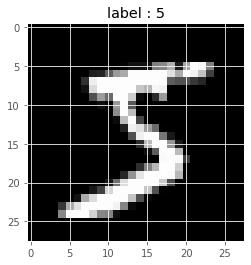

In [45]:
## 画像を可視化 ##
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

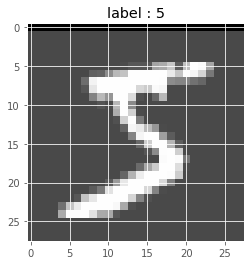

[[-105.35 -105.35 -105.35 ... -105.35 -105.35 -105.35]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [46]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
# image -= 105.35 # 意図的に負の小数値を作り出してみる
image[0] = -105.35 # 意図的に負の小数値を作り出してみる

# 自動スケーリングあり
plt.imshow(image, 'gray')   # 最小値が0となるように自動的にスケーリングされる
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image[:10]) # 値を確認

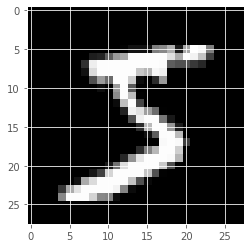

In [47]:
# 自動スケーリング無し
plt.imshow(image, 'gray', vmin = 0, vmax = 255);   # 範囲外の値は0 or 255に置換される (自動スケールされない)

In [48]:
## 画像データを正規化 ##
X_train_transformed = X_train.astype(np.float) / 255
X_test_transformed = X_test.astype(np.float) / 255
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# X_test_transformed = scaler.transform(X_test)
# print(X_train_transformed.max()) # 1.0
# print(X_test_transformed.min()) # 0.0

In [49]:
## One Hot Encoding ##
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train)
print(y_train_one_hot)

(60000,)
(60000, 10)
float64
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [50]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.8, random_state=0)
# print(X_train1.shape) # (48000, 784)
# print(X_test1.shape) # (12000, 784)
# print(y_train1.shape) # (48000,)
# print(y_test1.shape) # (12000,)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.99, random_state=0)
X_train1 = X_train1[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
X_test1 = X_test1[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_transformed[:6000, :], y_train[:6000], train_size=0.8, random_state=0)
X_train2 = X_train2[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
X_test2 = X_test2[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
print(X_train2.shape) # (4800, 784)
print(X_test2.shape) # (1200, 784)
print(y_train2.shape) # (4800,)
print(y_test2.shape) # (1200,)


(59400, 1, 28, 28)
(600, 1, 28, 28)
(59400,)
(600,)
(4800, 1, 28, 28)
(1200, 1, 28, 28)
(4800,)
(1200,)


In [51]:
y_train1

array([4, 4, 7, ..., 7, 1, 4], dtype=uint8)

### ●Scratch2dCNNClassifierクラス

In [52]:
class Scratch2dCNNClassifier():
    """
    2次元CNNネットワーク分類器(9層)
    ●層：　
        ・SimpleConv2dLayer
        ・SigmoidLayer or TanhLayer or ReLU
        ・MaxPool2dLayer
        ・SimpleConv2dLayer
        ・SigmoidLayer or TanhLayer or ReLU
        ・MaxPool2dLayer
        ・FlattenLayer
        ・FullyConnectedLayer
        ・SoftmaxLayer
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, layer_list, epoch, batch_size, early_stop=None, random_state=None, verbose=True):
        self.verbose = verbose
        self.flag = 0
        self.layer_list = layer_list    # 各層のリスト（fitメソッドにて各層のクラスをインスタンス化）
        self.layer_num = len(layer_list)   # 層の数
        self.epoch = epoch  # エポック
        self.batch_size = batch_size    # バッチサイズ
        self.early_stop = early_stop    # 早期打ち切りのイテレーション回数
        self.random_state = random_state
        np.random.seed(random_state)   #乱数シードを設定
        self.enc = OneHotEncoder(handle_unknown='ignore', sparse=False)   # OneHotエンコーダ
        self.loss = np.array([])    # 損失関数（学習データ）
        self.val_loss = np.array([])    # 損失関数（検証データ）

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        n_samples = X.shape[0]    # サンプル数
        counter = 0   # 早期終了用のカウンタ

        # 学習に使用する各種変数を初期化
        self._init_variables(X)

        # 学習データの目的変数をOneHotエンコーディング
        Y = self.enc.fit_transform(y[:, np.newaxis])
        # ミニバッチ学習用のクラス作成
        get_mini_batch = GetMiniBatch(X, Y, batch_size=self.batch_size, seed=self.random_state)

        # 検証データも与えられている場合
        if ((X_val is not None) and (y_val is not None)):
            # OneHotエンコーディング
            Y_val = enc.transform(y_val[:, np.newaxis])

        # エポックの回数ループ
        for j in range(self.epoch):
            if self.verbose:   print("■エポック{}回目".format(j))   # デバッグ情報出力
            get_mini_batch.__iter__()  # ミニバッチのイテレータをリセット

            # 全バッチデータを学習完了するまでループ（＝イテレーションの回数）
            for i, (X_mini, Y_mini) in enumerate(get_mini_batch):
                if self.verbose:   print("■イテレーション{}回目".format(i))   # デバッグ情報出力
                # 入力層から出力層までの順伝播処理および逆伝播処理
                Zout = self._exec_propagation(X_mini, Y_mini)
                # 損失関数
                self.loss = np.append(self.loss, self._calcurate_loss(Y_mini, Zout))

                # 検証データも与えられている場合は検証データに対しても同様の処理を行う
                if ((X_val is not None) and (y_val is not None)):
                    # 入力層から出力層までの順伝播処理
                    Zout_val = self._exec_forward_propagation(X_val)
                    # 損失関数
                    self.val_loss = np.append(self.val_loss, self._calcurate_loss(Y_val, Zout_val))

                # 早期終了のイテレーション回数が設定されている場合、カウンタをインクリメント
                if (self.early_stop is not None):
                    counter += 1
                    # カウンタが設定値に到達したら学習を強制終了
                    if (counter >= self.early_stop):
                        break

            # カウンタが設定値に到達したら学習を強制終了
            if (self.early_stop is not None):
                if (counter >= self.early_stop):
                    break

        if self.verbose:   print("■学習完了")
        return

    def predict(self, X):
        """
        DNN分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred    次の形のndarray, shape (n_samples, )
            ラベルの推定値
        """
        Z = self._exec_forward_propagation(X)   # 順伝播処理
        y_pred = np.argmax(Z, axis=1)
        return  y_pred

    def predict_proba(self, X):
        """
        DNN分類器を使い推定値の確率を出力する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred_proba    次の形のndarray, shape (n_samples, n_output)
            ラベルの各クラスごとの確率の推定値
        """
        y_pred_proba = self._exec_forward_propagation(X)   # 順伝播処理
        return  y_pred_proba

    def plot_learning_curve(self):
        """
        学習曲線をプロットする関数
        Parameters
        ----------
        None
        Returns
        -------
        None
        """
        # 学習データと検証データのそれぞれの損失関数の値をグラフに描画
        fig, ax = plt.subplots(figsize=(15, 10), dpi=50)
        ax.set_title("Learning Curve")
        ax.set_xlabel("Iteration Number")
        ax.set_ylabel("Loss")
        ax.plot(self.loss, color = "blue", label="train")
        ax.plot(self.val_loss, color = "red", label="validation")
        ax.legend(loc='best') # 凡例を最適位置に表示
        plt.show()
        return

    def _init_variables(self, X):
        """
        学習に使用する各種変数を初期化する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        None
        """
        if self.verbose:   print("■_init_variablesメソッド開始")  # デバッグ情報出力
        n_samples = X.shape[0]    # サンプル数

        self.iter = int(n_samples / self.batch_size)   # イテレーション数
        self.layer = [LayerClass(**keywards) for LayerClass, keywards in self.layer_list]    # 各層のインスタンスのリスト

        if self.verbose:   print("■_init_variablesメソッド終了")  # デバッグ情報出力
        return

    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # サンプル数の次元を削除（CNNのための暫定処置）
        X_online = X.reshape(X.shape[-3], X.shape[-2], X.shape[-1])

        # 順伝播処理
        A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
        B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        Z1 = self.layer[2].forward(B1)               # MaxPool2dLayer

        A2 = self.layer[3].forward(Z1)               # SimpleConv2dLayer
        B2 = self.layer[4].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        C2 = self.layer[5].forward(B2)               # MaxPool2dLayer
        Z2 = self.layer[6].forward(C2)               # FlattenLayer

        A3 = self.layer[7].forward(Z2)               # FullyConnectedLayer
        Zout = self.layer[8].forward(A3)             # SoftmaxLayer


        # 逆伝播処理
        dA3 = self.layer[8].backward(Zout, Y)        # SoftmaxLayer
        dZ2 = self.layer[7].backward(dA3, Z2)        # FullyConnectedLayer

        dC2 = self.layer[6].backward(dZ2, C2)        # FlattenLayer
        dB2 = self.layer[5].backward(dC2, B2)        # MaxPool2dLayer
        dA2 = self.layer[4].backward(dB2, A2)        # SigmoidLayer or TanhLayer or ReLU
        dZ1 = self.layer[3].backward(dA2, Z1)        # SimpleConv2dLayer

        dB1 = self.layer[2].backward(dZ1, B1)        # MaxPool2dLayer
        dA1 = self.layer[1].backward(dB1, A1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X_online)  # SimpleConv2dLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (n_sample, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (n_sample, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 各サンプルデータを１つずつ取り出して順伝播処理実行
        for i, X_online in enumerate(X):
            # デバッグ情報出力
            if self.verbose:   print("■{}番目の検証データ".format(i))

            # 順伝播処理
            A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
            B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
            Z1 = self.layer[2].forward(B1)               # MaxPool2dLayer

            A2 = self.layer[3].forward(Z1)               # SimpleConv2dLayer
            B2 = self.layer[4].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
            C2 = self.layer[5].forward(B2)               # MaxPool2dLayer
            Z2 = self.layer[6].forward(C2)               # FlattenLayer

            A3 = self.layer[7].forward(Z2)               # FullyConnectedLayer
            Zout_temp = self.layer[8].forward(A3)        # SoftmaxLayer

            if (i == 0):
                Zout = Zout_temp
            else:
                Zout = np.append(Zout, Zout_temp, axis=0)

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

    def _calcurate_loss(self, Y, Z):
        """
        損失関数（交差エントロピー誤差: L = -1/(batch_size)*ΣΣy_jk*log(Z_jk)）の計算
        Parameters
        ----------
        Y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルデータ（OneHotEncoding済み）
        Z : 次の形のndarray, shape (batch_size, n_output)
            出力層での出力値
        Returns
        ----------
        loss : numpy.float
          損失関数(交差エントロピー誤差)
        """
        batch_size = Y.shape[0]
        n_output = Y.shape[1]
        sigma = 0

        sigma = (Y * np.log(Z)).sum()   # ΣΣy_jk*log(Z_jk)の計算
        loss = - (1 / batch_size) * sigma
        return  loss

### ●Scratch2dCNNClassifier2クラス

In [53]:
class Scratch2dCNNClassifier2(Scratch2dCNNClassifier):
    """
    2次元CNNネットワーク分類器(6層)
    ●層：　
        ・SimpleConv2dLayer
        ・SigmoidLayer or TanhLayer or ReLU
        ・MaxPool2dLayer
        ・FlattenLayer
        ・FullyConnectedLayer
        ・SoftmaxLayer
    Parameters
    ----------
    Attributes
    ----------
    """
    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # サンプル数の次元を削除（CNNのための暫定処置）
        X_online = X.reshape(X.shape[-3], X.shape[-2], X.shape[-1])

        # 順伝播処理
        A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
        B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        C1 = self.layer[2].forward(B1)               # MaxPool2dLayer
        Z1 = self.layer[3].forward(C1)               # FlattenLayer

        A2 = self.layer[4].forward(Z1)               # FullyConnectedLayer
        Zout = self.layer[5].forward(A2)             # SoftmaxLayer


        # 逆伝播処理
        dA2 = self.layer[5].backward(Zout, Y)        # SoftmaxLayer
        dZ1 = self.layer[4].backward(dA2, Z1)        # FullyConnectedLayer

        dC1 = self.layer[3].backward(dZ1, C1)        # FlattenLayer
        dB1 = self.layer[2].backward(dC1, B1)        # MaxPool2dLayer
        dA1 = self.layer[1].backward(dB1, A1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X_online)  # SimpleConv2dLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (n_sample, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (n_sample, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 各サンプルデータを１つずつ取り出して順伝播処理実行
        for i, X_online in enumerate(X):
            # デバッグ情報出力
            if self.verbose:   print("■{}番目の検証データ".format(i))

            # 順伝播処理
            A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
            B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
            C1 = self.layer[2].forward(B1)               # MaxPool2dLayer
            Z1 = self.layer[3].forward(C1)               # FlattenLayer

            A2 = self.layer[4].forward(Z1)               # FullyConnectedLayer
            Zout_temp = self.layer[5].forward(A2)        # SoftmaxLayer

            if (i == 0):
                Zout = Zout_temp
            else:
                Zout = np.append(Zout, Zout_temp, axis=0)

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

### ●Scratch2dCNNClassifier3クラス

In [54]:
class Scratch2dCNNClassifier3(Scratch2dCNNClassifier):
    """
    2次元CNNネットワーク分類器(8層)
    ●層：　
        ・SimpleConv2dLayer
        ・SigmoidLayer or TanhLayer or ReLU
        ・MaxPool2dLayer
        ・SimpleConv2dLayer
        ・SigmoidLayer or TanhLayer or ReLU
        ・FlattenLayer
        ・FullyConnectedLayer
        ・SoftmaxLayer
    Parameters
    ----------
    Attributes
    ----------
    """
    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # サンプル数の次元を削除（CNNのための暫定処置）
        X_online = X.reshape(X.shape[-3], X.shape[-2], X.shape[-1])

        # 順伝播処理
        A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
        B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        Z1 = self.layer[2].forward(B1)               # MaxPool2dLayer

        A2 = self.layer[3].forward(Z1)               # SimpleConv2dLayer
        B2 = self.layer[4].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        Z2 = self.layer[5].forward(B2)               # FlattenLayer

        A3 = self.layer[6].forward(Z2)               # FullyConnectedLayer
        Zout = self.layer[7].forward(A3)             # SoftmaxLayer


        # 逆伝播処理
        dA3 = self.layer[7].backward(Zout, Y)        # SoftmaxLayer
        dZ2 = self.layer[6].backward(dA3, Z2)        # FullyConnectedLayer

        dB2 = self.layer[5].backward(dZ2, B2)        # FlattenLayer
        dA2 = self.layer[4].backward(dB2, A2)        # SigmoidLayer or TanhLayer or ReLU
        dZ1 = self.layer[3].backward(dA2, Z1)        # SimpleConv2dLayer

        dB1 = self.layer[2].backward(dZ1, B1)        # MaxPool2dLayer
        dA1 = self.layer[1].backward(dB1, A1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X_online)  # SimpleConv2dLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (n_sample, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (n_sample, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 各サンプルデータを１つずつ取り出して順伝播処理実行
        for i, X_online in enumerate(X):
            # デバッグ情報出力
            if self.verbose:   print("■{}番目の検証データ".format(i))

            # 順伝播処理
            A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
            B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
            Z1 = self.layer[2].forward(B1)               # MaxPool2dLayer

            A2 = self.layer[3].forward(Z1)               # SimpleConv2dLayer
            B2 = self.layer[4].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
            Z2 = self.layer[5].forward(B2)               # FlattenLayer

            A3 = self.layer[6].forward(Z2)               # FullyConnectedLayer
            Zout_temp = self.layer[7].forward(A3)        # SoftmaxLayer

            if (i == 0):
                Zout = Zout_temp
            else:
                Zout = np.append(Zout, Zout_temp, axis=0)

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

### ●Scratch2dCNNClassifier4クラス

In [55]:
class Scratch2dCNNClassifier4(Scratch2dCNNClassifier):
    """
    2次元CNNネットワーク分類器(9層)
    ●層：　
        ・SimpleConv2dLayer
        ・ReLULayer
        ・MaxPool2dLayer
        ・SimpleConv2dLayer
        ・ReLULayer
        ・MaxPool2dLayer
        ・FlattenLayer
        ・FullyConnectedLayer
        ・ReLULayer
        ・FullyConnectedLayer
        ・ReLULayer
        ・FullyConnectedLayer
        ・SoftmaxLayer
    Parameters
    ----------
    Attributes
    ----------
    """
    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # サンプル数の次元を削除（CNNのための暫定処置）
        X_online = X.reshape(X.shape[-3], X.shape[-2], X.shape[-1])

        # 順伝播処理
        A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
        B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        Z1 = self.layer[2].forward(B1)               # MaxPool2dLayer

        A2 = self.layer[3].forward(Z1)               # SimpleConv2dLayer
        B2 = self.layer[4].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        C2 = self.layer[5].forward(B2)               # MaxPool2dLayer
        Z2 = self.layer[6].forward(C2)               # FlattenLayer

        A3 = self.layer[7].forward(Z2)               # FullyConnectedLayer
        Z3 = self.layer[8].forward(A3)               # SigmoidLayer or TanhLayer or ReLU
        
        A4 = self.layer[9].forward(Z3)               # FullyConnectedLayer
        Z4 = self.layer[10].forward(A4)              # SigmoidLayer or TanhLayer or ReLU
        
        A5 = self.layer[11].forward(Z4)              # FullyConnectedLayer
        Zout = self.layer[12].forward(A5)            # SoftmaxLayer


        # 逆伝播処理
        dA5 = self.layer[12].backward(Zout, Y)       # SoftmaxLayer
        dZ4 = self.layer[11].backward(dA5, Z4)       # FullyConnectedLayer
        
        dA4 = self.layer[10].backward(dZ4, A4)       # SigmoidLayer or TanhLayer or ReLU
        dZ3 = self.layer[9].backward(dA4, Z3)        # FullyConnectedLayer
        
        dA3 = self.layer[8].backward(dZ3, A3)        # SigmoidLayer or TanhLayer or ReLU
        dZ2 = self.layer[7].backward(dA3, Z2)        # FullyConnectedLayer

        dC2 = self.layer[6].backward(dZ2, C2)        # FlattenLayer
        dB2 = self.layer[5].backward(dC2, B2)        # MaxPool2dLayer
        dA2 = self.layer[4].backward(dB2, A2)        # SigmoidLayer or TanhLayer or ReLU
        dZ1 = self.layer[3].backward(dA2, Z1)        # SimpleConv2dLayer

        dB1 = self.layer[2].backward(dZ1, B1)        # MaxPool2dLayer
        dA1 = self.layer[1].backward(dB1, A1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X_online)  # SimpleConv2dLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (n_sample, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (n_sample, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 各サンプルデータを１つずつ取り出して順伝播処理実行
        for i, X_online in enumerate(X):
            # デバッグ情報出力
            if self.verbose:   print("■{}番目の検証データ".format(i))

            # 順伝播処理
            A1 = self.layer[0].forward(X_online)         # SimpleConv2dLayer
            B1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
            Z1 = self.layer[2].forward(B1)               # MaxPool2dLayer

            A2 = self.layer[3].forward(Z1)               # SimpleConv2dLayer
            B2 = self.layer[4].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
            C2 = self.layer[5].forward(B2)               # MaxPool2dLayer
            Z2 = self.layer[6].forward(C2)               # FlattenLayer

            A3 = self.layer[7].forward(Z2)               # FullyConnectedLayer
            Z3 = self.layer[8].forward(A3)               # SigmoidLayer or TanhLayer or ReLU
            
            A4 = self.layer[9].forward(Z3)               # FullyConnectedLayer
            Z4 = self.layer[10].forward(A4)              # SigmoidLayer or TanhLayer or ReLU
            
            A5 = self.layer[11].forward(Z4)              # FullyConnectedLayer
            Zout_temp = self.layer[12].forward(A5)       # SoftmaxLayer

            if (i == 0):
                Zout = Zout_temp
            else:
                Zout = np.append(Zout, Zout_temp, axis=0)

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

### ●GetMiniBatchクラス

In [56]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._counter = 0
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
            # print("Warning: バッチデータが最後に達しました！　データの先頭に戻ります!!!(self._counter = {})".format(self._counter))
            # self._counter = 0
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


## ミニバッチデータを取得するサンプルコード ##
get_mini_batch = GetMiniBatch(X_train1, y_train1, batch_size=20, seed=0)
# get_mini_batch = GetMiniBatch(X_test1, y_test1, batch_size=20, seed=0)
print("len(get_mini_batch):")
print(len(get_mini_batch)) # 2400
print("get_mini_batch[5]:")
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
# for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
#     # このfor文内でミニバッチが使える
#     # print("■{}番目のmini_X_train".format(i))
#     # print(mini_X_train[0])
#     pass

a = get_mini_batch.__iter__()
for i in range(2):
    mini_X_train, mini_y_train = get_mini_batch.__next__()
    print(mini_X_train, mini_y_train)

len(get_mini_batch):
2970
get_mini_batch[5]:
(array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0

In [57]:
a = [1, 2, 3]
id(a)

139676964869696

### ●FullyConnectedLayerクラス

In [58]:
class FullyConnectedLayer:
    """
    ノード数n_nodes_prevからn_nodes_currentへの全結合層
    Parameters
    ----------
    n_nodes_prev : int
      前の層のノード数
    n_nodes_current : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes_prev, n_nodes_current, initializer, optimizer, verbose=False):
        self.n_nodes_prev = n_nodes_prev
        self.n_nodes_current = n_nodes_current
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        self.verbose = verbose
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W =self.initializer.init_W(n_nodes_prev, n_nodes_current) # 重み
        self.B =self.initializer.init_B(n_nodes_prev, n_nodes_current) # バイアス
        self.W_log = np.array([])
        self.B_log = np.array([])
        self.flag = 1

    def forward(self, Zprev):
        """
        フォワード
        Parameters
        ----------
        Zprev : 次の形のndarray, shape (batch_size, n_nodes_prev)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_current)
            出力
        """
        if self.verbose:   print("■全結合層 処理（順伝播）実行")   # デバッグ情報出力
        A = (Zprev @ self.W) + self.B.reshape(1, self.B.shape[0])
        return A

    def backward(self, dA, Zprev):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes_current)
            後ろから流れてきた勾配
        Zprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前層の出力Z（当層が第2層の場合、Zprev=Z1）
        Returns
        ----------
        dZprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前に流す勾配
        """
        if self.verbose:   print("■全結合層 処理（順伝播）実行")   # デバッグ情報出力
        dW = Zprev.T @ dA
        dB = dA.sum(axis=0)
        dZprev = dA @ self.W.T

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        # # パラメータの一部のみログに記録
        # if (self.flag == 1):
        #     self.W_log = self.W[0, :2].reshape(1, -1)
        #     self.B_log = self.B[:2].reshape(1, -1)
        #     self.flag = 0
        # else:
        #     self.W_log = np.append(self.W_log, self.W[0, :2].reshape(1, -1), axis=0)
        #     self.B_log = np.append(self.B_log, self.B[:2].reshape(1, -1), axis=0)

        return dZprev

### ●SimpleConv1dクラス

In [59]:
class SimpleConv1dLayer:
    """
    1次元の畳み込み層
    Parameters
    ----------
    """
    def __init__(self, n_ch_out, n_ch_in, filter_size, padding, stride, initializer, optimizer, verbose=False):
        self.n_ch_out = n_ch_out    # 出力チャネル数
        self.n_ch_in = n_ch_in    # 入力チャネル数
        self.filter_size = filter_size  # フィルターサイズ
        self.padding = padding  # パディング
        self.stride = stride    # ストライド
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        self.verbose = verbose
        self.W = self.initializer.init_W_conv(n_ch_out, n_ch_in, filter_size)   # 重み
        self.B = self.initializer.init_B_conv(n_ch_out)   # バイアス
        # self.B = np.zeros((n_ch_out, 1))   # バイアス

    def forward(self, X):
        """
        順伝播処理
        Parameters
        ----------
        X : 次の形のndarray, shape (n_ch_in, n_in)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n_ch_out, n_out)
            出力
        """
        if self.verbose:   print("■1次元畳み込み処理（順伝播）実行")   # デバッグ情報出力
        n_in = X.shape[1]   # 入力Xのサイズ
        n_out = self._calculate_n_out(n_in)   # 出力Aのサイズ

        # 入力チャネル数のチェック
        if (self.n_ch_in != X.shape[0]):
            print("Warning: 入力データのチャネル数が設定と一致しません。強制終了します")
            raise EnvironmentError

        self.X_partial = np.zeros((self.n_ch_in, n_out, self.filter_size))
        A = np.zeros((self.n_ch_out, n_out))

        # フィルターサイズ分ループ
        for i in range(self.filter_size):
            self.X_partial[:, :, i] = X[:, i : n_out + i]

        # [TBD]以下の処理はパディング=0, ストライド=1の場合のみに対応した処理。
        # 出力チャネル数分ループ
        for k in range(self.n_ch_out):
            A_out_ch = np.zeros((n_out, 1))
            # # 入力チャネル数分ループ
            # for j in range(self.n_ch_in):
            #     for i in range(self.filter_size):
            #         self.X_partial[j, :, i] = X[j, i : n_out + i]

            #     # A_i = Σ(X_(i+s) * W_s + B)  (s=0 ～ F-1)
            #     A_temp = self.X_partial[j] @ self.W[k, j].reshape(-1, 1)
            #     A_out_ch += A_temp

            # A_i = Σ(X_(i+s) * W_s + B)  (s=0 ～ F-1)
            W_k = self.W[k]
            A_temp = self.X_partial @ W_k[:, np.newaxis, :].transpose(0, 2, 1)
            A_out_ch = A_temp.sum(axis=0)

            A_out_ch += + self.B[k] * np.ones((n_out, 1))
            A[k] = A_out_ch.T

        return A

    def backward(self, dA, X):
        """
        逆伝播処理
        Parameters
        ----------
        dA : 次の形のndarray, shape (n_ch_out, n_out)
            出力AのLに関する偏微分
        X : 次の形のndarray, shape (n_ch_in, n_in)
            入力
        Returns
        ----------
        dX : 次の形のndarray, shape (n_ch_in, n_in)
            入力XのLに関する偏微分
        """
        if self.verbose:   print("■1次元畳み込み処理（逆伝播）実行")   # デバッグ情報出力
        n_diff = self.filter_size - 1   # n_outとn_inの差
        n_in = X.shape[1]   # 入力Xのサイズ
        dW = np.zeros((self.n_ch_out, self.n_ch_in, self.filter_size))
        dB = np.zeros((self.n_ch_out, 1))
        dA_zero_pad = np.zeros((self.n_ch_out, n_in, self.filter_size))
        dX = np.zeros((self.n_ch_in, n_in))

        # 出力チャネル数分ループ
        for k in range(self.n_ch_out):
            # 入力チャネル数分ループ
            for j in range(self.n_ch_in):

                # dW = ΣdA_i * X_(i+s)  (i=0 ～ n_out-1)
                dW[k, j] = dA[k] @ self.X_partial[j]
                # dB = ΣdA_i  (i=0 ～ n_out-1)
                dB[k] = dA[k].sum()

                 # dXの計算式の"dA_j-s"の部分の0パディングされた配列を用意する処理
                for i in range(self.filter_size):
                    if (i == 0):
                        zero_pad = np.zeros(n_diff)    # 0パディングのための配列
                        dA_zero_pad_temp = np.concatenate([dA[k], zero_pad])
                        dA_zero_pad[k, :, i] = dA_zero_pad_temp
                    else:
                        dA_zero_pad_temp = np.roll(dA_zero_pad_temp, 1)
                        dA_zero_pad[k, :, i] = dA_zero_pad_temp

                # dX_j = ΣdA_j-s * W_s  (s=0 ～ F-1)
                # dX[j] += dA_zero_pad[k] @ self.W[k, j].reshape(-1, 1)
                dX_temp = dA_zero_pad[k] @ self.W[k, j].reshape(-1, 1)
                dX[j] += dX_temp.reshape(-1)

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        return  dX

    def _calculate_n_out(self, n_in):
        """
        逆伝播処理
        Parameters
        ----------
        n_in : int
            入力Xのサイズ
        Returns
        ----------
        nout : 出力Aのサイズ
        """
        n_out = ((n_in + 2 * self.padding - self.filter_size) / self.stride) + 1
        return int(n_out)

### ●SimpleConv2dクラス

In [60]:
class SimpleConv2dLayer:
    """
    1次元の畳み込み層
    Parameters
    ----------
    """
    def __init__(self, n_ch_out, n_ch_in, filter_h_size, filter_w_size, padding, stride, n_in_h, n_in_w, initializer, optimizer, verbose=False):
        self.n_ch_out = n_ch_out    # 出力チャネル数
        self.n_ch_in = n_ch_in    # 入力チャネル数
        self.filter_h_size = filter_h_size   # 縦方向のフィルターサイズ
        self.filter_w_size = filter_w_size   # 横方向のフィルターサイズ
        self.padding = padding  # パディング
        self.stride = stride    # ストライド
        self.n_in_h = n_in_h    # 入力Xの縦方向のサイズ
        self.n_in_w = n_in_w    # 入力Xの横方向のサイズ
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        self.verbose = verbose
        self.W = self.initializer.init_W_conv(n_ch_out, n_ch_in, filter_h_size, filter_w_size, n_in=(n_in_h * n_in_w))   # 重み
        self.B = self.initializer.init_B_conv(n_ch_out, n_in=(n_in_h * n_in_w))   # バイアス
        # self.B = np.zeros((n_ch_out, 1))   # バイアス

    def forward(self, X):
        """
        順伝播処理
        Parameters
        ----------
        X : 次の形のndarray, shape (n_ch_in, n_in_h, n_in_w)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n_ch_out, n_out_h, n_out_w)
            出力
        """
        if self.verbose:   print("■2次元畳み込み処理（順伝播）実行")   # デバッグ情報出力
        n_in_h = X.shape[-2]   # 入力Xの縦方向のサイズ
        n_in_w = X.shape[-1]   # 入力Xの横方向のサイズ
        n_out_h, n_out_w = self._calculate_n_out(n_in_h, n_in_w)   # 出力Aの縦方向と横方向のサイズ
        Fh = self.filter_h_size   # 縦方向のフィルターサイズ
        Fw = self.filter_w_size   # 横方向のフィルターサイズ

        # 入力チャネル数のチェック
        if (self.n_ch_in != X.shape[0]):
            print("Warning: 入力データのチャネル数が設定と一致しません。強制終了します")
            raise EnvironmentError

        # 入力Xのサイズチェック
        if ((self.n_in_h != n_in_h) or (self.n_in_w != n_in_w)):
            print("Warning: 入力データのサイズが設定と一致しません。強制終了します")
            raise EnvironmentError

        self.X_partial = np.zeros((self.n_ch_in, n_out_h, n_out_w, Fh * Fw))
        A = np.zeros((self.n_ch_out, n_out_h, n_out_w))

        # 縦方向の出力サイズ分ループ
        for i in range(n_out_h):
            # フィルターサイズ(Fh)分ループ
            for s in range(Fh):
                # フィルターサイズ(Fw)分ループ
                for t in range(Fw):
                    column = Fw * s + t   # 操作するX_partialの列番号
                    self.X_partial[:, i, :, column] = X[:, i + s, t : n_out_w + t]

        # [TBD]以下の処理はパディング=0, ストライド=1の場合のみに対応した処理。
        # 出力チャネル数分ループ
        for m in range(self.n_ch_out):
            A_out_ch = np.zeros((n_out_h, n_out_w))
            # 入力チャネル数分ループ
            for k in range(self.n_ch_in):
                # 縦方向の出力サイズ分ループ
                for i in range(n_out_h):
                    # A_i = Σ(X_(i+s) * W_s + B)  (s=0 ～ F-1)
                    A_temp = self.X_partial[k, i] @ self.W[m, k].reshape(-1, 1)
                    A_out_ch[i] += A_temp.reshape(-1)

            A_out_ch += self.B[m] * np.ones((n_out_h, n_out_w))
            A[m] = A_out_ch.T

        return A

    def backward(self, dA, X):
        """
        逆伝播処理
        Parameters
        ----------
        dA : 次の形のndarray, shape (n_ch_out, n_out_h, n_out_w)
            出力AのLに関する偏微分
        X : 次の形のndarray, shape (n_ch_in, n_in_h, n_in_w)
            入力
        Returns
        ----------
        dX : 次の形のndarray, shape (n_ch_in, n_in_h, n_in_w)
            入力XのLに関する偏微分
        """
        if self.verbose:   print("■2次元畳み込み処理（逆伝播）実行")   # デバッグ情報出力
        Fh = self.filter_h_size   # 縦方向のフィルターサイズ
        Fw = self.filter_w_size   # 横方向のフィルターサイズ
        n_in_h = X.shape[-2]   # 入力Xの縦方向のサイズ
        n_in_w = X.shape[-1]   # 入力Xの横方向のサイズ
        n_out_h, n_out_w = self._calculate_n_out(n_in_h, n_in_w)   # 出力Aの縦方向と横方向のサイズ
        n_diff = Fw - 1   # n_out_wとn_in_wの差
        Fh = self.filter_h_size   # 縦方向のフィルターサイズ
        Fw = self.filter_w_size   # 横方向のフィルターサイズ

        # 入力Xのサイズチェック
        if ((self.n_in_h != n_in_h) or (self.n_in_w != n_in_w)):
            print("Warning: 入力データのサイズが設定と一致しません。強制終了します")
            raise EnvironmentError

        # 初期化
        dW = np.zeros((self.n_ch_out, self.n_ch_in, Fh, Fw))
        dB = np.zeros((self.n_ch_out, 1))
        dA_zero_pad = np.zeros((self.n_ch_out, n_in_h, n_in_w, Fh * Fw))
        dX = np.zeros((self.n_ch_in, n_in_h, n_in_w))

        ## dAの算出時に使用するdA_zero_pad配列の準備 ##
        # 出力チャネル数分ループ
        for m in range(self.n_ch_out):
            dA_zero_pad_temp2 = np.zeros((n_in_w, Fw))
            dA_zero_pad_temp3 = np.zeros((n_in_w, Fw * (Fh -1)))    # 0パディングのための配列
            # 入力Xの縦方向のサイズ分ループ
            for i in range(n_in_h):
                if (i <= (n_out_h - 1)):
                    # フィルターサイズ(Fw)分ループ
                    for t in range(Fw):
                        if (t == 0):
                            zero_pad = np.zeros(n_diff)    # 0パディングのための配列
                            dA_zero_pad_temp = np.concatenate([dA[m, i], zero_pad])
                            dA_zero_pad_temp2[:, t] = dA_zero_pad_temp
                        else:
                            dA_zero_pad_temp = np.roll(dA_zero_pad_temp, 1)
                            dA_zero_pad_temp2[:, t] = dA_zero_pad_temp
                else:
                    dA_zero_pad_temp2 = np.zeros((n_in_w, Fw))
                dA_zero_pad_temp3 = np.concatenate([dA_zero_pad_temp2, dA_zero_pad_temp3], axis=1)
                dA_zero_pad[m, i] = dA_zero_pad_temp3[:, :Fh * Fw]

        ## dW, dB, dAの算出 ##
        # 出力チャネル数分ループ
        for m in range(self.n_ch_out):
            # 入力チャネル数分ループ
            for k in range(self.n_ch_in):
                # 出力Aの縦方向のサイズ分ループ
                for i in range(n_out_h):
                    # dW_mkst = ΣΣdA_mij * X_k(i+s)(j+t)  (i=0 ～ n_out_h-1, j=0 ～ n_out_w-1)
                    dW[m, k] += (dA[m, i] @ self.X_partial[k, i]).reshape(Fh, Fw)
                    # dB_m = ΣΣdA_mij  (i=0 ～ n_out_h-1, j=0 ～ n_out_w-1)
                    dB[m] = dA[m].sum()

                # 入力Xの縦方向のサイズ分ループ
                for i2 in range(n_in_h):
                    # dX_kij = ΣΣΣdA_m(i-s)(j-t) * W_mkst  (m=0 ～ n_out_ch-1, s=0 ～ Fh-1, t=0 ～ Fw-1)
                    dX_temp = dA_zero_pad[m, i2] @ (self.W[m, k].reshape(-1, 1))
                    dX[k, i2] += dX_temp.reshape(-1)

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        return  dX

    def _calculate_n_out(self, n_in_h, n_in_w):
        """
        逆伝播処理
        Parameters
        ----------
        n_in_h : 入力Xの縦方向のサイズ
        n_in_w : 入力Xの横方向のサイズ
        Returns
        ----------
        n_out_h : 出力Aの縦方向のサイズ
        n_out_w : 出力Aの横方向のサイズ
        """
        n_out_h = ((n_in_h + 2 * self.padding - self.filter_h_size) / self.stride) + 1
        n_out_w = ((n_in_w + 2 * self.padding - self.filter_w_size) / self.stride) + 1
        return int(n_out_h), int(n_out_w)

### ●MaxPool2dLayerクラス

In [61]:
class MaxPool2dLayer:
    """
    最大値プーリング層
    Parameters
    ----------
    """
    def __init__(self, stride_h, stride_w, verbose=False):
        self.verbose = verbose
        self.stride_h = stride_h
        self.stride_w = stride_w

    def forward(self, X):
        """
        順伝播処理
        Parameters
        ----------
        X : 次の形のndarray, shape (n_ch, n_in_h, n_in_w)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n_ch, n_out_h, n_out_w)
            出力
        """
        if self.verbose:   print("■2次元最大値プーリング処理（順伝播）実行")   # デバッグ情報出力
        n_in_h = X.shape[-2]   # 入力Xの縦方向のサイズ
        n_in_w = X.shape[-1]   # 入力Xの横方向のサイズ
        n_out_h, n_out_w = self._calculate_n_out(n_in_h, n_in_w)   # 出力Aの縦方向と横方向のサイズ
        Sh = self.stride_h   # 縦方向のストライドサイズ（＝フィルターサイズ）
        Sw = self.stride_w   # 横方向のストライドサイズ（＝フィルターサイズ）
        n_ch = X.shape[0]   # 出力Aのチャネル数（＝入力と同じ）

        # 初期化
        A = np.zeros((n_ch, n_out_h, n_out_w))    # 出力A
        self.mask_argmax = np.zeros((n_ch, n_out_h * n_out_w)).astype(np.uint64)    # 最大値のインデックス番号を保持するための変数（逆伝播処理で使用）

        # チャネル数分ループ
        for m in range(n_ch):
            X_deployed = np.zeros((n_out_h * n_out_w, Sh * Sw))
            index = 0
            # X ⇒ X_deployedに変換
            for i in range(n_out_h):
                for j in range(n_out_w):
                    mask = np.full((n_in_h, n_in_w), False)   # プーリング対象領域を抽出するためのマスク
                    offset_h = i*Sh
                    offset_w = j*Sw
                    mask[offset_h:(offset_h + Sh), offset_w:(offset_w + Sw)] = True   # プーリング対象領域のマスク要素のみをTrueにセット
                    X_deployed[index] = X[m, mask]   # 入力Xの内、プーリング対象領域の要素をX_deployedの各行に格納
                    index += 1
            # 最大値プーリング処理
            A_deplpyed = np.max(X_deployed, axis=1)   #X_deployedの各行の最大値の配列を取得
            self.mask_argmax[m] = np.argmax(X_deployed, axis=1)   # 最大値要素のインデックスの配列をインスタンス変数に保存

            A[m] = A_deplpyed.reshape(n_out_h, n_out_w)

        return A

    def backward(self, dA, X):
        """
        逆伝播処理
        Parameters
        ----------
        dA : 次の形のndarray, shape (n_ch, n_out_h, n_out_w)
            出力AのLに関する偏微分
        X : 次の形のndarray, shape (n_ch, n_in_h, n_in_w)
            入力
        Returns
        ----------
        dX : 次の形のndarray, shape (n_ch, n_in_h, n_in_w)
            入力XのLに関する偏微分
        """
        if self.verbose:   print("■2次元最大値プーリング処理（逆伝播）実行")   # デバッグ情報出力

        n_out_h = dA.shape[-2]   # 出力Aの縦方向のサイズ（=dAの縦方向のサイズ）
        n_out_w = dA.shape[-1]   # 出力Aの横方向のサイズ（=dAの横方向のサイズ）
        n_in_h, n_in_w = self._calculate_n_in(n_out_h, n_out_w)   # 入力Xの縦方向と横方向のサイズ（＝dXの縦横のサイズ）
        Sh = self.stride_h   # 縦方向のストライドサイズ（＝フィルターサイズ）
        Sw = self.stride_w   # 横方向のストライドサイズ（＝フィルターサイズ）
        n_ch = dA.shape[0]   # dXのチャネル数（＝dAと同じ）

        # 初期化
        dX = np.zeros((n_ch, n_in_h, n_in_w))

        # チャネル数分ループ
        for m in range(n_ch):
            # dA[m]を(n_out_h, n_out_w) ⇒ (n_out_h*n_out_w, )に平滑化
            dA_deployed = dA[m].reshape(-1)
            dX_deployed = np.zeros((n_out_h * n_out_w, Sh * Sw))
            # 順伝播処理の際に最大値が格納されていた要素と同じ行・列にdAの各要素を代入
            for i, index in enumerate(self.mask_argmax[m]):
                dX_deployed[i, index] = dA_deployed[i]

            index2 = 0
            # dX_deployed ⇒ dXへの変換処理
            for i in range(n_out_h):
                for j in range(n_out_w):
                    offset_h = i*Sh
                    offset_w = j*Sw
                    # dX_deployedの各行を(Sh, Sw)にreshapeし、dXにセット
                    dX[m, offset_h:(offset_h + Sh), offset_w:(offset_w + Sw)] = dX_deployed[index2].reshape(Sh, Sw)
                    index2 += 1
        return  dX

    def _calculate_n_out(self, n_in_h, n_in_w):
        """
        逆伝播処理
        Parameters
        ----------
        n_in_h : 入力Xの縦方向のサイズ
        n_in_w : 入力Xの横方向のサイズ
        Returns
        ----------
        n_out_h : 出力Aの縦方向のサイズ
        n_out_w : 出力Aの横方向のサイズ
        """
        n_out_h = n_in_h / self.stride_h
        n_out_w = n_in_w / self.stride_w
        return int(n_out_h), int(n_out_w)

    def _calculate_n_in(self, n_out_h, n_out_w):
        """
        逆伝播処理
        Parameters
        ----------
        n_out_h : 出力Aの縦方向のサイズ
        n_out_w : 出力Aの横方向のサイズ
        Returns
        ----------
        n_in_h : 入力Xの縦方向のサイズ
        n_in_w : 入力Xの横方向のサイズ
        """
        n_in_h = n_out_h * self.stride_h
        n_in_w = n_out_w * self.stride_w
        return int(n_in_h), int(n_in_w)

### ●FlattenLayerクラス

In [62]:
class FlattenLayer:
    """
    平滑化層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def forward(self, X):
        """
        順伝播処理
        Parameters
        ----------
        X : 次の形のndarray, shape (n_ch, n_in_h, n_in_w)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n_ch * n_in_h * n_in_w, )
            出力
        """
        if self.verbose:   print("■平滑化処理（順伝播）実行")   # デバッグ情報出力
        self.X_shape = X.shape
        A = X.reshape(1, -1)

        return A

    def backward(self, dA, _=None):
        """
        逆伝播処理
        Parameters
        ----------
        dA : 次の形のndarray, shape (n_ch, n_out_h, n_out_w)
            出力AのLに関する偏微分
        Returns
        ----------
        dX : 次の形のndarray, shape (n_ch, n_in_h, n_in_w)
            入力XのLに関する偏微分
        """
        if self.verbose:   print("■平滑化処理（逆伝播）実行")   # デバッグ情報出力
        dX = dA.reshape(self.X_shape)

        return  dX

### ●SigmoidLayerクラス

In [63]:
class SigmoidLayer:
    """
    シグモイド関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■シグモイド関数（順伝播）実行")   # デバッグ情報出力
        Z = self._sigmoid_func(A)
        return Z

    def backward(self, dZ, A):
        """
        逆伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■シグモイド関数（逆伝播）実行")   # デバッグ情報出力
        dA = dZ * (1 - self._sigmoid_func(A)) * self._sigmoid_func(A)
        return dA

    def _sigmoid_func(self, A):
        """
        シグモイド関数(1/(1+exp(-A)))の演算処理
        Parameters
        ----------
        Returns
        -------
        """
        Z = 1/(1 + np.exp(-A))
        return Z

### ●TanhLayerクラス

In [64]:
class TanhLayer:
    """
    ハイパボリックタンジェント関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理((exp(A)-exp(-A))/(exp(A)+exp(-A)))
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ハイパボリックtan関数（順伝播）実行")   # デバッグ情報出力
        Z = self._tanh_func(A)
        return Z

    def backward(self, dZ, A):
        """
        逆伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ハイパボリックtan関数（逆伝播）実行")   # デバッグ情報出力
        dA = dZ * (1 - self._tanh_func(A)* self._tanh_func(A)) 
        return dA

    def _tanh_func(self, A):
        """
        ハイパボリックtan関数((exp(A)-exp(-A))/(exp(A)+exp(-A)))の演算処理
        Parameters
        ----------
        Returns
        -------
        """
        Z = (np.exp(A) - np.exp(-A)) / (np.exp(A) + np.exp(-A))
        return Z

### ●ReLULayerクラス

In [65]:
class ReLULayer:
    """
    ReLU関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def forward(self, A):
        """
        順伝播処理
            # df(x)/dx = { x (x > 0)
            #            { 0 (x <= 0)
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ReLU関数（順伝播）実行")   # デバッグ情報出力
        # Z = np.where(A > 0, A, 0)
        self.mask = (A <= 0)
        Z = A.copy()
        Z[self.mask] = 0
        return Z

    def backward(self, dZ, A):
        """
        逆伝播処理
            # df(x)/dx = { 1 (x > 0)
            #            { 0 (x <= 0)
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ReLU関数（逆伝播）実行")   # デバッグ情報出力
        # dA = np.where(A > 0, 1, 0)
        dZ[self.mask] = 0
        dA = dZ
        return dA

### ●SoftmaxLayerクラス

In [66]:
class SoftmaxLayer:
    """
    ソフトマックス関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose=False):
        self.verbose = verbose

    def forward(self, A):
        """
        順伝播処理(Z_k = (exp(A_k)/(Σexp(A_i))
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ソフトマックス関数実行")   # デバッグ情報出力
        batch_size = A.shape[0]   # バッチサイズ
        n_nodes_current = A.shape[1]    # 当層のノード数（＝目的変数のクラス数）
        Z = np.zeros((batch_size, n_nodes_current))

        sigma = np.exp(A).sum(axis=1)   # "Σexp(A_i) (i=1～10)"の部分の計算
        Z = (np.exp(A)) / sigma.reshape(-1, 1)
        return Z

    def backward(self, Z, Y):
        """
        逆伝播処理
        Parameters
        ----------
          Z : 順伝播処理の出力
          Y : 目的変数（OneHotEncoding済み）
        Returns
        ----------
          dA
        """
        if self.verbose:   print("■ソフトマックス関数（逆伝播）実行")   # デバッグ情報出力
        batch_size = Z.shape[0]   # バッチサイズ
        dA = (1 / batch_size) * (Z - Y)
        return dA

### ●SimpleInitializerクラス

In [67]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        全結合層の重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes_prev, n_nodes_current)

        return W

    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        全結合層のバイアスの初期化
        Parameters
        ----------
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes_current)
        return B

    def init_W_conv(self, n_ch_out, n_ch_in, filter_h_size, filter_w_size, n_in=None):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        filter_size : int
          フィルターのサイズ
        Returns
        ----------
        W_conv :
        """
        W_conv = self.sigma * np.random.randn(n_ch_out, n_ch_in, filter_h_size, filter_w_size)

        return W_conv

    def init_B_conv(self, n_ch_out, n_in=None):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        Returns
        ----------
        """
        B_conv = self.sigma * np.random.randn(n_ch_out, 1)

        return B_conv

### ●XavierInitializerクラス

In [68]:
class XavierInitializer:
    """
    「Xavierの初期値」による初期化（シグモイド関数・ハイパボリックタンジェント関数の層で使用）
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self):
        pass
        
    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = (1 / np.sqrt(n_nodes_prev)) * np.random.randn(n_nodes_prev, n_nodes_current)
        return W

    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = (1 / np.sqrt(n_nodes_prev)) * np.random.randn(n_nodes_current)
        return B

    def init_W_conv(self, n_ch_out, n_ch_in, filter_h_size, filter_w_size, n_in):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        n_in : 入力サイズ（縦×横）
        Returns
        ----------
        W_conv :
        """
        W_conv = (1 / np.sqrt(n_in)) * np.random.randn(n_ch_out, n_ch_in, filter_h_size, filter_w_size)

        return W_conv

    def init_B_conv(self, n_ch_out, n_in):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        n_in : 入力サイズ（縦×横）
        Returns
        ----------
        """
        B_conv = (1 / np.sqrt(n_in)) * np.random.randn(n_ch_out, 1)

        return B_conv

### ●HeInitializerクラス

In [69]:
class HeInitializer:
    """
    「Heの初期値」による初期化（ReLU関数の層で使用）
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self):
        pass
        
    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = (np.sqrt(2 / n_nodes_prev)) * np.random.randn(n_nodes_prev, n_nodes_current)
        return W
        
    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = (np.sqrt(2 / n_nodes_prev)) * np.random.randn(n_nodes_current)
        return B

    def init_W_conv(self, n_ch_out, n_ch_in, filter_h_size, filter_w_size, n_in):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        n_in : 入力サイズ（縦×横）
        Returns
        ----------
        W_conv :
        """
        W_conv = (np.sqrt(2 / n_in)) * np.random.randn(n_ch_out, n_ch_in, filter_h_size, filter_w_size)

        return W_conv

    def init_B_conv(self, n_ch_out, n_in):
        """
        畳み込み層の重みの初期化
        Parameters
        ----------
        n_in : 入力サイズ（縦×横）
        Returns
        ----------
        """
        B_conv = (np.sqrt(2 / n_in)) * np.random.randn(n_ch_out, 1)

        return B_conv

### ●SGDクラス

In [70]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, param, grad, param_name):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        param : 更新前の層のインスタンス (shape: (n_nodes_prev, n_nodes_current))
        grad : 勾配 (shape: (n_nodes_prev, n_nodes_current))
        param_name : パラメータの名称   ※SGDでは未使用
        """
        ret_param = param - self.lr * grad
        return ret_param

### ●AdaGradクラス

In [71]:
class AdaGrad:
    """
    AdaGradによるパラメータの更新
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.flag = 1
        self.H = {}

    def update(self, param, grad, param_name):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        param : 更新前の層のインスタンス (shape: (n_nodes_prev, n_nodes_current))
        grad : 勾配 (shape: (n_nodes_prev, n_nodes_current))
        param_name : パラメータの名称
        """
        # 初回のみ
        if (param_name not in self.H):
            dic = {param_name : grad * grad + 1e-7}   # 0割防止のため1e-7を加算
        # 2回目以降
        else:
            dic = {param_name : (self.H[param_name] + grad * grad)}   # 前回までのself.H[param_name]にgrad * gradを加算
        self.H.update(dic)    # self.H[param_name]の値を更新
        ret_param = param -  self.lr * (1 / np.sqrt(self.H[param_name])) *grad
        # print("AdaGradの勾配の2乗和:")
        # print((1 / np.sqrt(self.H[param_name]))[0])
        return ret_param

### ●推定器の評価指標を記録するスコアボードのクラス

In [72]:
## 推定器の指標値を記録するスコアボードのクラス ##
class ScoreBoard():
    def __init__(self, name1=None, name2=None):
        self.df_score = pd.DataFrame([])   # 各指標値を記録するDataFrame
        self.confusion_matrix_dic = {}   # 混同行列の辞書
        if (name1 is None):   name1 = ""
        if (name2 is None):   name2 = ""
        self.name1 = name1
        self.name2 = name2
        print("{}スコアボード{}が生成されました。".format(self.name1, self.name2))

    def calcurate_scores(self, arg_y_true, arg_y_predict, arg_y_predict_proba=None, arg_columns=None):

        if ((len(np.unique(arg_y_true)) <= 2) and (len(np.unique(arg_y_predict)) <= 2)):
            # 2値分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict)    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict)    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict)    #F値
        else:
            # 3値以上の分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict, average="macro")    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict, average="macro")    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict, average="macro")    #F値

        #AUC
        if (arg_y_predict_proba is not None):
            roc_auc = roc_auc_score(arg_y_true, arg_y_predict_proba)
            score_list = [accuracy, precision, recall, f1, roc_auc]
            index_list = ["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"]
        else:
            score_list = [accuracy, precision, recall, f1]
            index_list = ["Accuacy", "Precision", "Recall", "F1"]

        #Confusion matrix（混同行列）
        print("\n")
        print("###Confusion matrix（混同行列）###")
        matrix = confusion_matrix(arg_y_true, arg_y_predict)
        df_confusion_matrix = pd.DataFrame(matrix)
        dic = {arg_columns:df_confusion_matrix}
        self.confusion_matrix_dic.update(dic)   # 評価名称をキーにして混同行列を辞書へ追加
        display(df_confusion_matrix)

        #指標値の比較用テーブルに登録
        # if(self.df_score.empty):
        #     self.df_score = pd.DataFrame([accuracy, precision, recall, f1, roc_auc], index=["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"], columns=[arg_columns])
        # else:
        df_score_temp = pd.DataFrame(data=score_list, index=index_list, columns=[arg_columns])
        self.df_score = pd.concat([self.df_score, df_score_temp], axis=1)
        print("\n")
        print("{}スコアボード{}:".format(self.name1, self.name2))
        display(self.df_score)

        # #ROC曲線、AUC
        # #y_testの値を2→1, 1→0に変換
        # y_test1_dummy = np.where(y_test1==1, 0, 1)
        # fpr, tpr, thresholds = metrics.roc_curve(y_test1_dummy, y_predict_proba[:, -1]) # FPR（偽陽性率）、TPR（真陽性率）、閾値を算出
        # auc = metrics.auc(fpr, tpr)  # AUCを算出
        # plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
        # plt.legend()
        # plt.title('ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.grid(True)

        # 決定領域を描画
        # decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel=df3.columns[0], ylabel=df3.columns[1], target_names=df3.iloc[:, -1].unique())
        
        return
    def display(self, key=None):
        if (key is not None):
            print("###Confusion matrix（混同行列）###")
            display(self.confusion_matrix_dic[key])
        print("###スコアボード###")
        display(self.df_score)
        return

    def reset_score(self):
        self.df_score = pd.DataFrame([])  # スコアボードを初期化
        return


# スコアボードをインスタンス化
score_board1 = ScoreBoard(name2 = "1")
score_board2 = ScoreBoard(name2 = "2")
score_board3 = ScoreBoard(name2 = "3")

スコアボード1が生成されました。
スコアボード2が生成されました。
スコアボード3が生成されました。


## 【問題1】2次元畳み込み層の作成
1次元畳み込み層のクラスConv1dを発展させ、2次元畳み込み層のクラスConv2dを作成してください。


フォワードプロパゲーションの数式は以下のようになります。

$$
a_{i,j,m} = \sum_{k=0}^{K-1}\sum_{s=0}^{F_{h}-1}\sum_{t=0}^{F_{w}-1}x_{(i+s),(j+t),k}w_{s,t,k,m}+b_{m}$$

$a_{i,j,m}$ : 出力される配列のi行j列、mチャンネルの値


$i$ : 配列の行方向のインデックス


$j$ : 配列の列方向のインデックス


$m$ : 出力チャンネルのインデックス


$K$ : 入力チャンネル数


$F_{h}, F_{w}$ : 高さ方向（h）と幅方向（w）のフィルタのサイズ


$x_{(i+s),(j+t),k}$ : 入力の配列の(i+s)行(j+t)列、kチャンネルの値


$w_{s,t,k,m}$ : 重みの配列のs行t列目。kチャンネルの入力に対して、mチャンネルへ出力する重み


$b_m$ : mチャンネルへの出力のバイアス項


すべてスカラーです。


次に更新式です。1次元畳み込み層や全結合層と同じ形です。

$$
w_{s,t,k,m}^{\prime} = w_{s,t,k,m} - \alpha \frac{\partial L}{\partial w_{s,t,k,m}} \\
b_{m}^{\prime} = b_{m} - \alpha \frac{\partial L}{\partial b_{m}}
$$

$\alpha$ : 学習率


$\frac{\partial L}{\partial w_{s,t,k,m}}$ : $w_{s,t,k,m}$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial b_{m}}$ : $b_{m}$ に関する損失 $L$ の勾配


勾配 $\frac{\partial L}{\partial w_{s,t,k,m}}$ や $\frac{\partial L}{\partial b_{m}}$ を求めるためのバックプロパゲーションの数式が以下である。

$$
\frac{\partial L}{\partial w_{s,t,k,m}} = \sum_{i=0}^{N_{out,h}-1}\sum_{j=0}^{N_{out,w}-1} \frac{\partial L}{\partial a_{i,j,m}}x_{(i+s)(j+t),k}\\
\frac{\partial L}{\partial b_{m}} = \sum_{i=0}^{N_{out,h}-1}\sum_{j=0}^{N_{out,w}-1}\frac{\partial L}{\partial a_{i,j,m}}
$$

$\frac{\partial L}{\partial a_i}$ : 勾配の配列のi行j列、mチャンネルの値


$N_{out,h},N_{out,w}$ : 高さ方向（h）と幅方向（w）の出力のサイズ


前の層に流す誤差の数式は以下です。

$$
\frac{\partial L}{\partial x_{i,j,k}} = \sum_{m=0}^{M-1}\sum_{s=0}^{F_{h}-1}\sum_{t=0}^{F_{w}-1} \frac{\partial L}{\partial a_{(i-s),(j-t),m}}w_{s,t,k,m}
$$

$\frac{\partial L}{\partial x_{i,j,k}}$ : 前の層に流す誤差の配列のi列j行、kチャンネルの値


$M$ : 出力チャンネル数


ただし、 $i-s<0$ または $i-s>N_{out,h}-1$ または $j-t<0$ または $j-t>N_{out,w}-1$ のとき $\frac{\partial L}{\partial a_{(i-s),(j-t),m}} =0$ です。

## 【問題2】小さな配列での2次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。


入力 x、重み w を次のようにします。

In [73]:
# CNN2 のフォワードを流す時の入力データ
# (1,1,4,4)
x = np.array([[[[ 1,  2,  3,  4],
                [ 5,  6,  7,  8],
                [ 9, 10, 11, 12],
                [13, 14, 15, 16]]]])
# (2,3,3)
w = np.array([[[ 0.,  0.,  0.],
               [ 0.,  1.,  0.],
               [ 0., -1.,  0.]],
              [[ 0.,  0.,  0.],
               [ 0., -1.,  1.],
               [ 0.,  0.,  0.]]])

フォワードプロパゲーションをすると出力は次のようになります。

array([[[-4, -4],
        [-4, -4]],
       [[ 1,  1],
        [ 1,  1]]])

次にバックプロパゲーションを考えます。誤差は次のようであったとします。

In [74]:
# (?,1,2,2,)
delta = np.array([[[ -4,  -4],
                   [ 10,  11]],
                  [[  1,  -7],
                   [  1, -11]]])

バックプロパゲーションをすると次のような値になります。パディングがある場合は出力は次のようになります。

array([[-5,  4],
       [13, 27]])

### 【問題2 解答】
SimpleConv2dLayerクラスを実装し、下記の通りforward処理とbackword処理が期待通り動作することを確認できた。


In [75]:
# (n_ch_in, n_in_h, n_in_w): (1,4,4)
x = np.array([[[ 1,  2,  3,  4],
               [ 5,  6,  7,  8],
               [ 9, 10, 11, 12],
               [13, 14, 15, 16]]])

# (n_ch_out, n_ch_in, Fh, Fw): (2,1,3,3)
w = np.array([[[[ 0.,  0.,  0.],
                [ 0.,  1.,  0.],
                [ 0., -1.,  0.]]],
              [[[ 0.,  0.,  0.],
                [ 0., -1.,  1.],
                [ 0.,  0.,  0.]]]])

#(self, n_ch_out, n_ch_in, filter_h_size, filter_w_size, padding, stride, initializer, optimizer, verbose=False)
b = np.array([0, 0])

initializer = SimpleInitializer(sigma=0.01)
optimizer = SGD(lr=0.1)
layer = SimpleConv2dLayer(n_ch_out=2, n_ch_in=1, filter_h_size=3, filter_w_size=3, padding=0, stride=1, n_in_h=4, n_in_w=4, initializer=initializer, optimizer=optimizer)

layer.W = w
layer.B = b

a = layer.forward(x)
print("a:")
print(a)    # 期待値: [[[-4, -4],[-4, -4]], [[ 1,  1],[ 1,  1]]]
print("\n")

delta_a = np.array([[[ -4,  -4],
                     [ 10,  11]],
                    [[  1,  -7],
                     [  1, -11]]])

delta_x = layer.backward(delta_a, x)
# print("delta_w:")
# print(delta_w)
# print("\n")
# print("delta_b:")
# print(delta_b)
# print("\n")
print("delta_x:")
print(delta_x)

a:
[[[-4. -4.]
  [-4. -4.]]

 [[ 1.  1.]
  [ 1.  1.]]]


delta_x:
[[[  0.   0.   0.   0.]
  [  0.  -5.   4.  -7.]
  [  0.  13.  27. -11.]
  [  0. -10. -11.   0.]]]


## 【問題3】2次元畳み込み後の出力サイズ
畳み込みを行うと特徴マップのサイズが変化します。どのように変化するかは以下の数式から求められます。この計算を行う関数を作成してください。

$$
N_{h,out} =  \frac{N_{h,in}+2P_{h}-F_{h}}{S_{h}} + 1\\
N_{w,out} =  \frac{N_{w,in}+2P_{w}-F_{w}}{S_{w}} + 1
$$

## 【問題4】最大プーリング層の作成
最大プーリング層のクラスMaxPool2Dを作成してください。プーリング層は数式で表さない方が分かりやすい部分もありますが、数式で表すとフォワードプロパゲーションは以下のようになります。

$$
a_{i,j,k} = \max_{(p,q)\in P_{i,j}}x_{p,q,k}
$$

$P_{i,j}$ : i行j列への出力する場合の入力配列のインデックスの集合。 $S_{h}×S_{w}$ の範囲内の行（p）と列（q）


$S_{h}, S_{w}$ : 高さ方向（h）と幅方向（w）のストライドのサイズ


$(p,q)\in P_{i,j}$ : $P_{i,j}$ に含まれる行（p）と列（q）のインデックス


$a_{i,j,m}$ : 出力される配列のi行j列、kチャンネルの値


$x_{p,q,k}$ : 入力の配列のp行q列、kチャンネルの値


ある範囲の中でチャンネル方向の軸は残したまま最大値を計算することになります。


バックプロパゲーションのためには、フォワードプロパゲーションのときの最大値のインデックス $(p,q)$ を保持しておく必要があります。フォワード時に最大値を持っていた箇所にそのままの誤差を流し、そこ以外には0を入れるためです。

In [76]:
# (n_ch_in, n_in_h, n_in_w): (1,4,4)
x = np.array([[[ 1,  9, 30,  4],
               [ 5,  3,  7,  8],
               [ 9, 10, 11, 12],
               [20, 14, 15, 16]],
              [[10,  9,  1,  4],
               [ 5,  3,  7,  8],
               [ 9, 21, 11, 19],
               [20, 14, 15, 16]]])

layer = MaxPool2dLayer(stride_h=2, stride_w=2, verbose=False)

a = layer.forward(x)
print("a:")
print(a)    # 期待値: [[[9, 30], [20, 16]], [[10, 8], [21, 19]]]
print("\n")

delta_a = np.array([[[ -4,  -4],
                     [ 10,  11]],
                    [[  1,  -7],
                     [  1, -11]]])

delta_x = layer.backward(delta_a, x)
print("delta_x:")
print(delta_x)
# 期待値: 
# [[[ 0, -4, -4,  0],
  # [ 0,  0,  0,  0],
  # [ 0,  0,  0,  0],
  # [10,  0,  0, 11]]
  #[[ 1,  0,  0,  0],
  # [ 0,  0,  0, -7],
  # [ 0,  1,  0,-11],
  # [ 0,  0,  0,  0]]]

a:
[[[ 9. 30.]
  [20. 16.]]

 [[10.  8.]
  [21. 19.]]]


delta_x:
[[[  0.  -4.  -4.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [ 10.   0.   0.  11.]]

 [[  1.   0.   0.   0.]
  [  0.   0.   0.  -7.]
  [  0.   1.   0. -11.]
  [  0.   0.   0.   0.]]]


### 【問題4 解答】
MaxPool2dLayerクラスを実装し、上記の通りforward処理とbackword処理が期待通り動作することを確認できた。

## 【問題6】平滑化
平滑化するためのFlattenクラスを作成してください。


フォワードのときはチャンネル、高さ、幅の3次元を1次元にreshapeします。その値は記録しておき、バックワードのときに再びreshapeによって形を戻します。


この平滑化のクラスを挟むことで出力前の全結合層に適した配列を作ることができます。



In [77]:
# (n_ch_in, n_in_h, n_in_w): (1,4,4)
x = np.arange(9).reshape(3, 3)

layer = FlattenLayer(verbose=False)

a = layer.forward(x)
print("a:")
print(a)    # 期待値: [0, 1, 2, 3, 4, 5, 6, 7, 8]
print("\n")

delta_a = np.arange(20, 11, -1)

delta_x = layer.backward(delta_a, x)
print("delta_x:")
print(delta_x)
# 期待値: 
# [[20, 19, 18],
#  [17, 16, 15],
#  [14, 13, 12]]

a:
[[0 1 2 3 4 5 6 7 8]]


delta_x:
[[20 19 18]
 [17 16 15]
 [14 13 12]]


### 【問題6 解答】
FlattenLayerクラスを実装し、上記の通りforward処理とbackword処理が期待通り動作することを確認できた。

## 【問題7】学習と推定
作成したConv2dを使用してMNISTを学習・推定し、Accuracyを計算してください。


精度は低くともまずは動くことを目指してください。

### ●動作確認

In [78]:
## 各畳み込み層の出力サイズ（ノード数）計算 ##
# 畳み込み層1
layer1 = SimpleConv2dLayer(n_ch_out=3, n_ch_in=1, filter_h_size=3, filter_w_size=3, padding=0, stride=1, n_in_h=28, n_in_w=28, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h1, n_out_w1 = layer1._calculate_n_out(n_in_h=28, n_in_w=28)

# 最大値プーリング層1
layer2 = MaxPool2dLayer(stride_h=2, stride_w=2, verbose=False)
n_out_h2, n_out_w2 = layer2._calculate_n_out(n_in_h=n_out_h1, n_in_w=n_out_w1)

# 畳み込み層2
layer3 = SimpleConv2dLayer(n_ch_out=1, n_ch_in=3, filter_h_size=2, filter_w_size=2, padding=0, stride=1, n_in_h=n_out_h2, n_in_w=n_out_w2, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h3, n_out_w3 = layer3._calculate_n_out(n_in_h=n_out_h2, n_in_w=n_out_w2)

# 最大値プーリング層2
layer4 = MaxPool2dLayer(stride_h=3, stride_w=3, verbose=False)
n_out_h4, n_out_w4 = layer4._calculate_n_out(n_in_h=n_out_h3, n_in_w=n_out_w3)

print("畳み込み層1の出力サイズ: ({}, {})".format(n_out_h1, n_out_w1))
print("最大値プーリング層1の出力サイズ: ({}, {})".format(n_out_h2, n_out_w2))
print("畳み込み層2の出力サイズ: ({}, {})".format(n_out_h3, n_out_w3))
print("最大値プーリング層2の出力サイズ: ({}, {})".format(n_out_h4, n_out_w4))

畳み込み層1の出力サイズ: (26, 26)
最大値プーリング層1の出力サイズ: (13, 13)
畳み込み層2の出力サイズ: (12, 12)
最大値プーリング層2の出力サイズ: (4, 4)


#### ・【パターン1】エポック:1, 学習率:0.1, バッチサイズ:1, HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax)

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[1.82269384e-03 5.31340586e-02 3.63724151e-03 ... 2.80820688e-04
  3.84547223e-02 7.26501234e-03]
 [2.11699501e-05 2.80899841e-06 1.36804994e-03 ... 1.84072004e-07
  4.05245007e-04 4.21148617e-05]
 [8.00225524e-04 5.60417279e-02 4.18833728e-02 ... 1.78323005e-04
  1.35440590e-02 1.48050367e-02]
 ...
 [1.36747510e-03 4.98801312e-03 6.21125444e-04 ... 1.28836581e-01
  3.91030494e-02 3.56155277e-01]
 [8.72064761e-03 1.46542602e-06 2.79884201e-03 ... 4.21935025e-02
  5.14696361e-03 9.37016230e-01]
 [3.96154634e-05 1.59300789e-06 1.15810818e-06 ... 5.64609473e-04
  5.53177768e-05 1.15223173e-03]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,59,0,0,1,0,1,0,0,3,0
1,0,75,0,0,0,1,0,0,0,0
2,0,2,47,0,1,0,0,1,1,0
3,0,0,0,53,0,5,0,0,1,2
4,0,1,0,0,56,0,0,1,0,1
5,4,0,0,2,0,46,0,0,0,0
6,0,0,1,0,0,0,61,1,0,0
7,1,1,0,1,1,0,0,59,0,1
8,1,3,3,0,0,1,0,0,45,1
9,0,0,1,0,2,0,0,4,1,47




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))"
Accuacy,0.913333
Precision,0.912132
Recall,0.909319
F1,0.910256


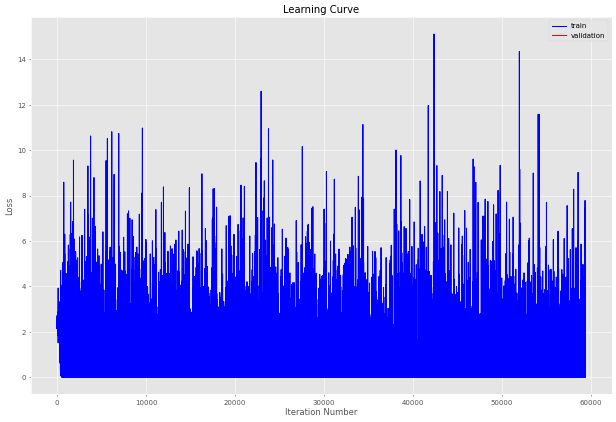

CPU times: user 11min 53s, sys: 2.83 s, total: 11min 56s
Wall time: 11min 55s


In [79]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
# early_stop = 10000   # 早期終了する場合のイテレーション回数（デバッグ用）
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "[パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_h_size":3, "filter_w_size":3, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":HeInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(3 * n_out_h2 * n_out_w2), "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier2(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・【パターン2】エポック:1, 学習率:0.1, バッチサイズ:1, XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax)

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 4 9 4]
y_predict_proba:
[[2.56416903e-02 6.29451108e-02 5.92284751e-03 ... 2.46133570e-03
  6.12345360e-02 1.09262898e-02]
 [3.74981796e-07 2.74566189e-09 3.56369283e-05 ... 1.66145143e-10
  7.50426331e-05 8.93975300e-06]
 [2.70084515e-04 1.13817944e-02 9.01550996e-02 ... 6.91528053e-05
  4.03313402e-02 3.01803886e-03]
 ...
 [1.86753171e-04 1.33127860e-02 1.93598450e-04 ... 1.93973427e-02
  1.35337451e-01 2.92258360e-01]
 [1.55362987e-01 5.13627959e-05 3.16484232e-02 ... 2.58071786e-01
  2.36641724e-02 4.98606284e-01]
 [8.27175268e-06 3.01920466e-06 7.25633651e-06 ... 2.66489662e-04
  4.76854556e-05 7.94509140e-03]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,62,0,0,0,0,0,1,0,1,0
1,0,75,0,0,0,1,0,0,0,0
2,0,4,43,0,0,0,2,1,2,0
3,4,0,0,46,0,6,0,1,3,1
4,1,1,0,0,50,0,0,2,0,5
5,8,0,0,1,1,41,0,0,1,0
6,2,1,1,0,0,0,59,0,0,0
7,1,2,1,0,1,0,0,56,0,3
8,3,5,3,3,0,1,1,0,37,1
9,3,0,1,1,4,0,0,4,2,40




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax))"
Accuacy,0.913333,0.848333
Precision,0.912132,0.851533
Recall,0.909319,0.839650
F1,0.910256,0.842024


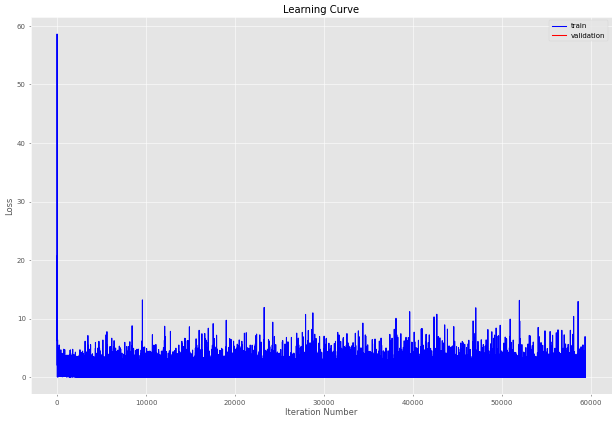

CPU times: user 11min 56s, sys: 2.8 s, total: 11min 59s
Wall time: 11min 58s


In [80]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
# early_stop = 10000   # 早期終了する場合のイテレーション回数（デバッグ用）
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "[パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_h_size":3, "filter_w_size":3, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":XavierInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (SigmoidLayer,        {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(3 * n_out_h2 * n_out_w2), "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier2(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

### 【問題7 解答】
下記2種類のパターンのCNNを作成して学習・推定を行ったところ、0.8～0.9のAccuracyが得られた。

・【パターン1】エポック:1, 学習率:0.1, バッチサイズ:1, HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax)<br>
・【パターン2】エポック:1, 学習率:0.1, バッチサイズ:1, XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax)
<br>

しかし、Sprint10のDNNでは0.97以上のAccuracyが得られたので、それに比べると推定精度が低い結果となった。<br>
精度改善のために試しに層の数を増やしてみたが（【パターン3】）、どのような入力データに対しても全く同じ出力結果となってしまっており、正常に学習できていない様子が伺える。<br>
学習率やInitializerやOptimizer等を色々変更してみたがそれでも上手くいかなかったので、学習が上手く行えていない原因については別途調査することとする。


・【パターン3】エポック:1, 学習率:0.1, バッチサイズ:1, HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax)


## 【問題8】

### ●動作確認

#### ・【パターン3】エポック:1, 学習率:0.1, バッチサイズ:1, layer:13(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-ReLU-FC-ReLU-FC-Softmax)

In [81]:
## 各畳み込み層の出力サイズ（ノード数）計算 ##
# 畳み込み層1
layer1 = SimpleConv2dLayer(n_ch_out=6, n_ch_in=1, filter_h_size=5, filter_w_size=5, padding=0, stride=1, n_in_h=28, n_in_w=28, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h10, n_out_w10 = layer1._calculate_n_out(n_in_h=28, n_in_w=28)

# 最大値プーリング層1
layer2 = MaxPool2dLayer(stride_h=2, stride_w=2, verbose=False)
n_out_h11, n_out_w11 = layer2._calculate_n_out(n_in_h=n_out_h10, n_in_w=n_out_w10)

# 畳み込み層2
layer3 = SimpleConv2dLayer(n_ch_out=16, n_ch_in=6, filter_h_size=5, filter_w_size=5, padding=0, stride=1, n_in_h=n_out_h11, n_in_w=n_out_w11, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h12, n_out_w12 = layer3._calculate_n_out(n_in_h=n_out_h11, n_in_w=n_out_w11)

# 最大値プーリング層2
layer4 = MaxPool2dLayer(stride_h=2, stride_w=2, verbose=False)
n_out_h13, n_out_w13 = layer4._calculate_n_out(n_in_h=n_out_h12, n_in_w=n_out_w12)

print("畳み込み層1の出力サイズ: ({}, {})".format(n_out_h10, n_out_w10))
print("最大値プーリング層1の出力サイズ: ({}, {})".format(n_out_h11, n_out_w11))
print("畳み込み層2の出力サイズ: ({}, {})".format(n_out_h12, n_out_w12))
print("最大値プーリング層2の出力サイズ: ({}, {})".format(n_out_h13, n_out_w13))

畳み込み層1の出力サイズ: (24, 24)
最大値プーリング層1の出力サイズ: (12, 12)
畳み込み層2の出力サイズ: (8, 8)
最大値プーリング層2の出力サイズ: (4, 4)


y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[1.03130459e-15 4.67062147e-06 1.32658408e-08 ... 1.30726334e-08
  7.61411433e-05 1.85591255e-05]
 [2.64030921e-11 2.20999342e-11 8.93451458e-07 ... 4.33869163e-15
  5.01644678e-07 1.85223218e-13]
 [4.37256174e-09 1.69672748e-08 3.73852323e-04 ... 4.59610945e-09
  7.06971026e-06 6.59601563e-10]
 ...
 [9.91124844e-11 1.24176933e-04 1.04718248e-08 ... 7.98602211e-03
  3.06574397e-04 8.63929153e-01]
 [1.21493840e-06 1.41036624e-07 8.92048606e-08 ... 5.80830474e-02
  5.23903851e-04 9.41331206e-01]
 [8.95549042e-18 2.02702060e-12 3.64936653e-12 ... 1.57834566e-07
  1.59731110e-11 7.83160599e-07]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,58,0,0,0,0,3,1,0,2,0
1,0,74,0,1,0,1,0,0,0,0
2,0,1,48,1,1,0,0,1,0,0
3,0,0,0,59,0,2,0,0,0,0
4,0,0,0,0,50,0,0,1,0,8
5,0,0,0,5,0,47,0,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,1,0,0,0,0,0,62,0,1
8,0,2,1,2,0,3,0,0,46,0
9,0,0,0,0,1,1,0,0,1,52




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.01, layer:13(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-ReLU-FC-ReLU-FC-Softmax))"
Accuacy,0.913333,0.848333,0.931667
Precision,0.912132,0.851533,0.932642
Recall,0.909319,0.839650,0.928758
F1,0.910256,0.842024,0.929100


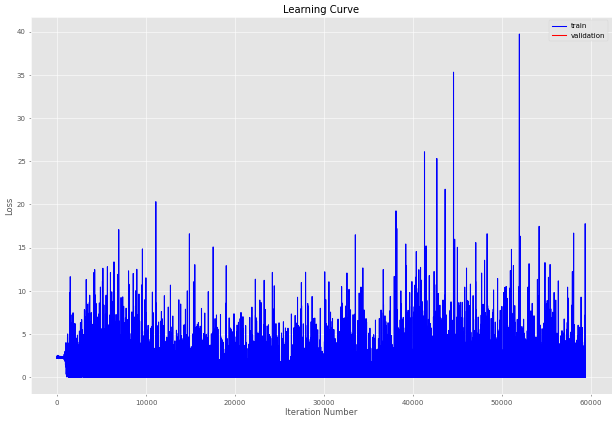

CPU times: user 1h 50min 43s, sys: 1h 24min 18s, total: 3h 15min 2s
Wall time: 1h 39min 12s


In [82]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 1   # バッチサイズ
# early_stop = 10000   # 早期終了する場合のイテレーション回数（デバッグ用）
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "layer:13(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-ReLU-FC-ReLU-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":6, "n_ch_in":1, "filter_h_size":5, "filter_w_size":5, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":SimpleInitializer(0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (SimpleConv2dLayer,   {"n_ch_out":16, "n_ch_in":6, "filter_h_size":5, "filter_w_size":5, "padding":0,"stride":1, "n_in_h":n_out_h11, "n_in_w":n_out_w11, "initializer":SimpleInitializer(0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(16 * n_out_h13 * n_out_w13), "n_nodes_current":120,  "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":120, "n_nodes_current":84,  "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":84, "n_nodes_current":10,  "initializer":SimpleInitializer(0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier4(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline3 = pipeline
columns3 = columns

## 【問題10】出力サイズとパラメータ数の計算
CNNモデルを構築する際には、全結合層に入力する段階で特徴量がいくつになっているかを事前に計算する必要があります。


また、巨大なモデルを扱うようになると、メモリや計算速度の関係でパラメータ数の計算は必須になってきます。フレームワークでは各層のパラメータ数を表示させることが可能ですが、意味を理解していなくては適切な調整が行えません。


以下の3つの畳み込み層の出力サイズとパラメータ数を計算してください。パラメータ数についてはバイアス項も考えてください。

```
1.
入力サイズ : 144×144, 3チャンネル
フィルタサイズ : 3×3, 6チャンネル
ストライド : 1
パディング : なし

2.
入力サイズ : 60×60, 24チャンネル
フィルタサイズ : 3×3, 48チャンネル
ストライド　: 1
パディング : なし

3.
入力サイズ : 20×20, 10チャンネル
フィルタサイズ: 3×3, 20チャンネル
ストライド : 2
パディング : なし
```

＊最後の例は丁度良く畳み込みをすることができない場合です。フレームワークでは余ったピクセルを見ないという処理が行われることがあるので、その場合を考えて計算してください。端が欠けてしまうので、こういった設定は好ましくないという例です。

In [83]:
# 畳み込み層1
# 入力サイズ : 144×144, 3チャンネル
# フィルタサイズ : 3×3, 6チャンネル
# ストライド : 1
# パディング : なし
layer = SimpleConv2dLayer(n_ch_out=2, n_ch_in=3, filter_h_size=3, filter_w_size=3, padding=0, stride=1, n_in_h=144, n_in_w=144, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h, n_out_w = layer._calculate_n_out(n_in_h=144, n_in_w=144)
print("畳み込み層1の出力サイズ: ({}, {})".format(n_out_h, n_out_w))

# 畳み込み層2
# 入力サイズ : 60×60, 24チャンネル
# フィルタサイズ : 3×3, 48チャンネル
# ストライド　: 1
# パディング : なし
layer = SimpleConv2dLayer(n_ch_out=2, n_ch_in=24, filter_h_size=3, filter_w_size=3, padding=0, stride=1, n_in_h=60, n_in_w=60, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h, n_out_w = layer._calculate_n_out(n_in_h=60, n_in_w=60)
print("畳み込み層1の出力サイズ: ({}, {})".format(n_out_h, n_out_w))

# 畳み込み層3
# 入力サイズ : 20×20, 10チャンネル
# フィルタサイズ: 3×3, 20チャンネル
# ストライド : 2
# パディング : なし
layer = SimpleConv2dLayer(n_ch_out=2, n_ch_in=10, filter_h_size=3, filter_w_size=3, padding=0, stride=2, n_in_h=20, n_in_w=20, initializer=SimpleInitializer(sigma=0.01), optimizer=SGD(0.1), verbose=False)
n_out_h, n_out_w = layer._calculate_n_out(n_in_h=20, n_in_w=20)
print("畳み込み層1の出力サイズ: ({}, {})".format(n_out_h, n_out_w))

畳み込み層1の出力サイズ: (142, 142)
畳み込み層1の出力サイズ: (58, 58)
畳み込み層1の出力サイズ: (9, 9)


### 【問題10 解答】
```
1.
入力サイズ : 144×144, 3チャンネル
フィルタサイズ : 3×3, 6チャンネル
ストライド : 1
パディング : なし
```
- 出力サイズ：　142 x 142,　2チャンネル
- パラメータ数：　3 x 3 x 6 = 54

```
2.
入力サイズ : 60×60, 24チャンネル
フィルタサイズ : 3×3, 48チャンネル
ストライド　: 1
パディング : なし
```
- 出力サイズ：　58 x 58,　2チャンネル
- パラメータ数：　3 x 3 x 48 = 432

```
3.
入力サイズ : 20×20, 10チャンネル
フィルタサイズ: 3×3, 20チャンネル
ストライド : 2
パディング : なし
```
- 出力サイズ：　9 x 9,　2チャンネル
- パラメータ数：　3 x 3 x 20 = 180

## 【その他】

### ●結果まとめ（保存用）

###スコアボード###


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.01, layer:13(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-ReLU-FC-ReLU-FC-Softmax))"
Accuacy,0.913333,0.848333,0.931667
Precision,0.912132,0.851533,0.932642
Recall,0.909319,0.839650,0.928758
F1,0.910256,0.842024,0.929100


■ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))


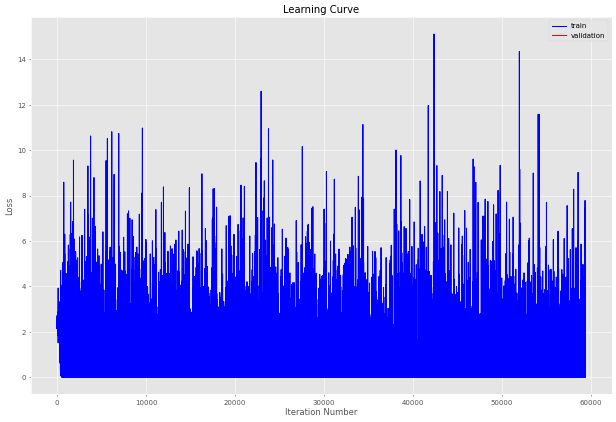

■ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax))


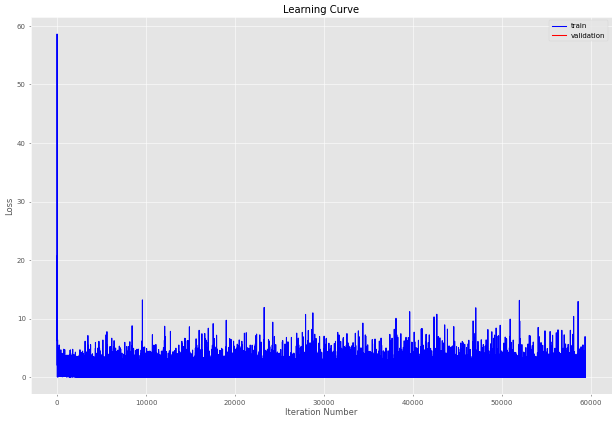

■ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.01, layer:13(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-ReLU-FC-ReLU-FC-Softmax))


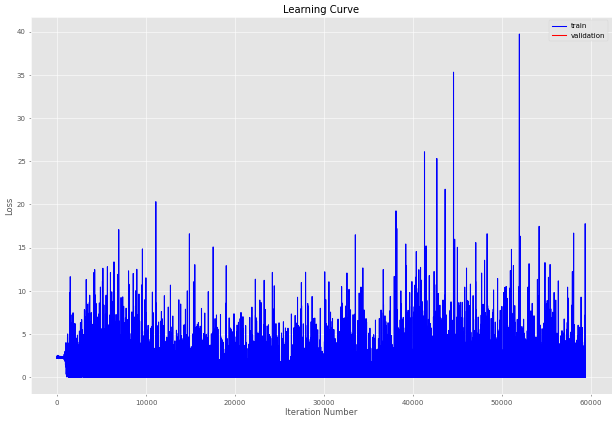

In [86]:
score_board1.display()
# 学習曲線をプロット
print("■" + columns1)
pipeline1["classifier"].plot_learning_curve()
print("■" + columns2)
pipeline2["classifier"].plot_learning_curve()
print("■" + columns3)
pipeline3["classifier"].plot_learning_curve()

### ●その他の動作確認例（参考 or 失敗例）

#### ・エポック:1, 学習率:0.1, バッチサイズ:1, SimpleInit, SGD, layer:6(Conv-Sig-Pool-Flatten-FC-Softmax)

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 4 9 4]
y_predict_proba:
[[4.97207849e-03 4.22988315e-03 1.50582276e-03 ... 1.85193613e-04
  6.83809645e-02 2.00522501e-03]
 [3.57101031e-05 1.66187572e-04 6.91937712e-05 ... 6.23765421e-08
  6.04928605e-06 2.84000825e-08]
 [4.24788629e-03 2.24183615e-02 5.64601387e-03 ... 7.60542639e-04
  2.32275997e-03 9.62903341e-05]
 ...
 [4.70033319e-02 1.81742864e-02 1.87106455e-03 ... 1.10057929e-01
  2.58699233e-03 2.23862163e-01]
 [3.22036797e-03 4.98067308e-07 5.27866937e-05 ... 7.95873841e-04
  2.42237023e-06 9.94717392e-01]
 [3.69960187e-05 6.85215755e-04 3.17011713e-04 ... 8.45372201e-04
  4.23016092e-05 1.08541515e-05]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,60,0,2,0,0,0,0,0,1,1
1,0,75,0,0,0,0,1,0,0,0
2,1,3,45,2,0,0,0,1,0,0
3,1,0,0,55,0,2,0,0,1,2
4,0,1,0,1,55,0,0,1,0,1
5,5,0,0,4,0,42,0,0,1,0
6,1,0,0,0,0,0,62,0,0,0
7,0,0,0,2,0,1,0,55,1,5
8,1,3,2,4,2,2,2,1,36,1
9,0,0,0,1,4,1,0,0,0,49




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.01, [パターン1]ReLU-ReLU-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)"
Accuacy,0.106667,0.106667,0.106667,0.105000,0.105000,0.560000,0.890000
Precision,0.010667,0.010667,0.010667,0.010500,0.010500,0.579865,0.890894
Recall,0.100000,0.100000,0.100000,0.100000,0.100000,0.526159,0.883234
F1,0.019277,0.019277,0.019277,0.019005,0.019005,0.479036,0.884153


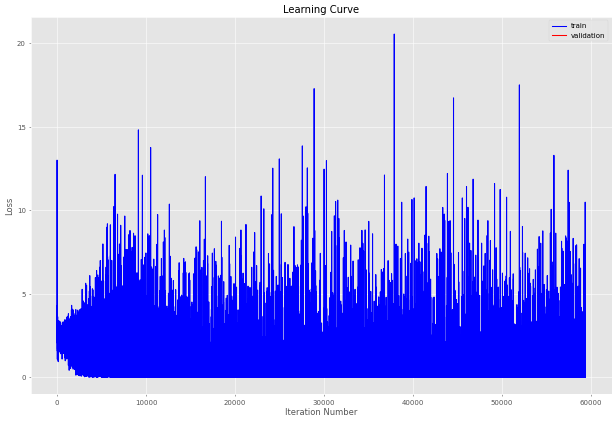

CPU times: user 12min 43s, sys: 2.43 s, total: 12min 45s
Wall time: 12min 44s


In [ ]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "SimpleInit, SGD, layer:6(Conv-Sig-Pool-Flatten-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_h_size":3, "filter_w_size":3, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr), "verbose":verbose}),
              (SigmoidLayer,        {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(3 * n_out_h2 * n_out_w2), "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier2(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・【パターン3】エポック:1, 学習率:0.1, バッチサイズ:1, HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax)

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[6 6 6 ... 6 6 6]
y_predict_proba:
[[0.08995703 0.10510628 0.08904956 ... 0.08167021 0.11514586 0.0987888 ]
 [0.08995703 0.10510628 0.08904956 ... 0.08167021 0.11514586 0.0987888 ]
 [0.08995703 0.10510628 0.08904956 ... 0.08167021 0.11514586 0.0987888 ]
 ...
 [0.08995703 0.10510628 0.08904956 ... 0.08167021 0.11514586 0.0987888 ]
 [0.08995703 0.10510628 0.08904956 ... 0.08167021 0.11514586 0.0987888 ]
 [0.08995703 0.10510628 0.08904956 ... 0.08167021 0.11514586 0.0987888 ]]


###Confusion matrix（混同行列）###


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,64,0,0,0
1,0,0,0,0,0,0,76,0,0,0
2,0,0,0,0,0,0,52,0,0,0
3,0,0,0,0,0,0,61,0,0,0
4,0,0,0,0,0,0,59,0,0,0
5,0,0,0,0,0,0,52,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,0,0,0,0,0,64,0,0,0
8,0,0,0,0,0,0,54,0,0,0
9,0,0,0,0,0,0,55,0,0,0




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン3]HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))"
Accuacy,0.885000,0.813333,0.105000
Precision,0.890795,0.827294,0.010500
Recall,0.879069,0.804974,0.100000
F1,0.878527,0.796787,0.019005


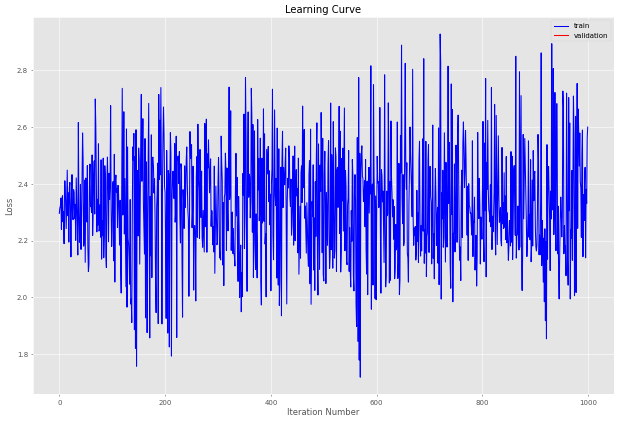

CPU times: user 21.5 s, sys: 60.7 ms, total: 21.6 s
Wall time: 21.5 s


In [ ]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "[パターン3]HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_h_size":3, "filter_w_size":3, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":HeInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (SimpleConv2dLayer,   {"n_ch_out":1, "n_ch_in":3, "filter_h_size":2, "filter_w_size":2, "padding":0,"stride":1, "n_in_h":n_out_h2, "n_in_w":n_out_w2, "initializer":HeInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":3, "stride_w":3, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(1 * n_out_h4 * n_out_w4), "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・エポック:1, 学習率:0.1, バッチサイズ:1, HeInit, AdaGrad, layer:8(Conv-ReLU-Pool-Conv-ReLU-Flatten-FC-Softmax)

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[5 5 5 ... 5 5 5]
y_predict_proba:
[[0.06480284 0.11426759 0.11238708 ... 0.09330076 0.06896692 0.07995055]
 [0.06480284 0.11426759 0.11238708 ... 0.09330076 0.06896692 0.07995055]
 [0.06480284 0.11426759 0.11238708 ... 0.09330076 0.06896692 0.07995055]
 ...
 [0.06480284 0.11426759 0.11238708 ... 0.09330076 0.06896692 0.07995055]
 [0.06480284 0.11426759 0.11238708 ... 0.09330076 0.06896692 0.07995055]
 [0.06480284 0.11426759 0.11238708 ... 0.09330076 0.06896692 0.07995055]]


###Confusion matrix（混同行列）###


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,64,0,0,0,0
1,0,0,0,0,0,76,0,0,0,0
2,0,0,0,0,0,52,0,0,0,0
3,0,0,0,0,0,61,0,0,0,0
4,0,0,0,0,0,59,0,0,0,0
5,0,0,0,0,0,52,0,0,0,0
6,0,0,0,0,0,63,0,0,0,0
7,0,0,0,0,0,64,0,0,0,0
8,0,0,0,0,0,54,0,0,0,0
9,0,0,0,0,0,55,0,0,0,0




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン2]XavierInit, AdaGrad, layer:6(Conv-Sigmoid-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン3]HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン3]HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))","ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax))"
Accuacy,0.885000,0.813333,0.105000,0.105000,0.105000,0.105000,0.105000,0.086667
Precision,0.890795,0.827294,0.010500,0.010500,0.010500,0.010500,0.010500,0.008667
Recall,0.879069,0.804974,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
F1,0.878527,0.796787,0.019005,0.019005,0.019005,0.019005,0.019005,0.015951


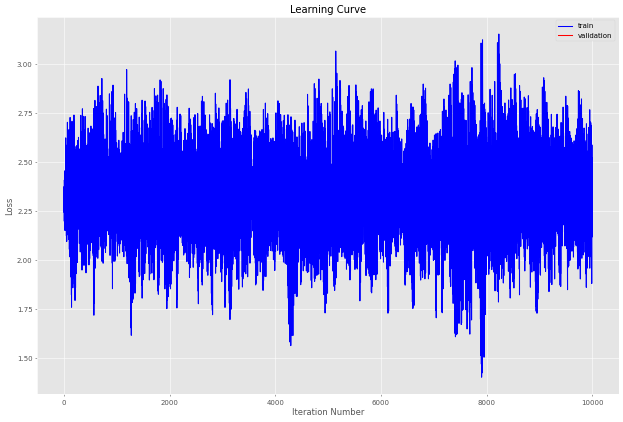

CPU times: user 55.4 s, sys: 153 ms, total: 55.6 s
Wall time: 55.5 s


In [ ]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "HeInit, AdaGrad, layer:9(Conv-ReLU-Pool-Conv-ReLU-Pool-Flatten-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_h_size":3, "filter_w_size":3, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":HeInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":3, "filter_h_size":2, "filter_w_size":2, "padding":0,"stride":1, "n_in_h":n_out_h2, "n_in_w":n_out_w2, "initializer":HeInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":3, "stride_w":3, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(3 * n_out_h4 * n_out_w4), "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・【パターン1】エポック:1, 学習率:0.1, バッチサイズ:1, HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax)

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 4 9 4]
y_predict_proba:
[[4.86400237e-03 3.50502623e-02 2.95260054e-03 ... 1.24092087e-03
  1.06459963e-02 3.65288356e-03]
 [9.63337294e-05 5.69024441e-06 9.71774559e-04 ... 6.09576483e-07
  3.74787009e-04 1.16903977e-04]
 [2.06032071e-03 9.31189394e-02 3.54247781e-02 ... 5.77836946e-04
  6.06862268e-03 3.19846544e-03]
 ...
 [7.58453311e-04 3.52300498e-02 8.14005295e-04 ... 1.19416683e-01
  2.06448862e-02 1.24051766e-01]
 [3.36237940e-02 3.15504584e-06 2.59325158e-03 ... 7.80896778e-02
  2.01197430e-03 8.39424756e-01]
 [1.64856948e-05 7.20108961e-06 6.20680291e-06 ... 9.32612469e-04
  2.02448405e-05 1.49265291e-03]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,60,0,0,0,3,0,0,0,1,0
1,0,76,0,0,0,0,0,0,0,0
2,0,3,45,0,0,0,1,1,2,0
3,0,0,0,48,0,9,0,1,0,3
4,0,2,0,0,56,0,1,0,0,0
5,1,0,0,0,1,50,0,0,0,0
6,1,1,1,0,0,0,59,1,0,0
7,1,2,0,0,2,0,0,58,0,1
8,1,5,5,1,1,6,0,1,33,1
9,0,0,1,0,4,1,0,3,0,46




スコアボード1:


,"ScratchDNN(epoch:1, iter:59400, b_size:1, lr:0.1, [パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax))"
Accuacy,0.885000
Precision,0.890795
Recall,0.879069
F1,0.878527


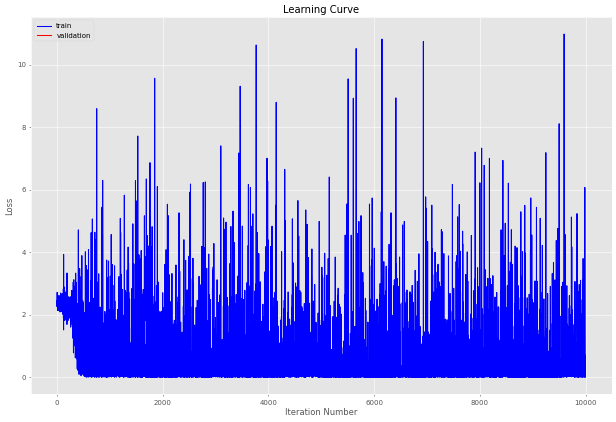

CPU times: user 2min 8s, sys: 1.21 s, total: 2min 9s
Wall time: 2min 9s


In [ ]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 1   # バッチサイズ
early_stop = 10000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "[パターン1]HeInit, AdaGrad, layer:6(Conv-ReLU-Pool-Flatten-FC-Softmax)"

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

             # LayerClass,          {keywards}
layer_list = [(SimpleConv2dLayer,   {"n_ch_out":3, "n_ch_in":1, "filter_h_size":3, "filter_w_size":3, "padding":0,"stride":1, "n_in_h":X.shape[-2], "n_in_w":X.shape[-1], "initializer":HeInitializer(), "optimizer":AdaGrad(lr), "verbose":verbose}),
              (ReLULayer,           {"verbose":verbose}),
              (MaxPool2dLayer,      {"stride_h":2, "stride_w":2, "verbose":verbose}),
              (FlattenLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":(3 * n_out_h2 * n_out_w2), "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", Scratch2dCNNClassifier2(    #推定器
        layer_list=layer_list,
        epoch=epoch,
        batch_size=batch_size,
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

pipeline.fit(X, y)
# pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns